In [61]:

import pandas as pd
import numpy as np

In [62]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sub_df = pd.read_csv("sample_submission.csv")

In [63]:
train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [64]:
train_df['stroke'].unique()

array([0, 1])

In [65]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [66]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15304.0,7651.500000,4418.028595,0.00,3825.75,7651.50,11477.25,15303.0
age,15304.0,41.417708,21.444673,0.08,26.00,43.00,57.00,82.0
hypertension,15304.0,0.049726,0.217384,0.00,0.00,0.00,0.00,1.0
heart_disease,15304.0,0.023327,0.150946,0.00,0.00,0.00,0.00,1.0
avg_glucose_level,15304.0,89.039853,25.476102,55.22,74.90,85.12,96.98,267.6
bmi,15304.0,28.112721,6.722315,10.30,23.50,27.60,32.00,80.1
stroke,15304.0,0.041296,0.198981,0.00,0.00,0.00,0.00,1.0


In [67]:
train_df.nunique()

id                   15304
gender                   3
age                    106
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level     3740
bmi                    407
smoking_status           4
stroke                   2
dtype: int64

In [68]:
train_df.duplicated().sum()

np.int64(0)

In [69]:
# Data Cleaning
sorted(train_df['age'].unique().tolist())[0:12]

[0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.68, 0.72, 0.8, 0.88]

In [70]:
train_df['age'] = np.ceil(train_df['age'])
test_df['age'] = np.ceil(test_df['age'])

In [71]:
train_df['gender'].value_counts()

gender
Female    9446
Male      5857
Other        1
Name: count, dtype: int64

In [72]:
train_df.drop(train_df[train_df['gender']=='Other'].index, inplace=True)
test_df.drop(test_df[test_df['gender']=='Other'].index, inplace=True)

In [73]:
# Exploratory Data Analysis(EDA)
!pip install plotly
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

sns.set_style("darkgrid")


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
plot_color = ['#008080', 'black']
sns.set_palette(['#008080', 'black'])

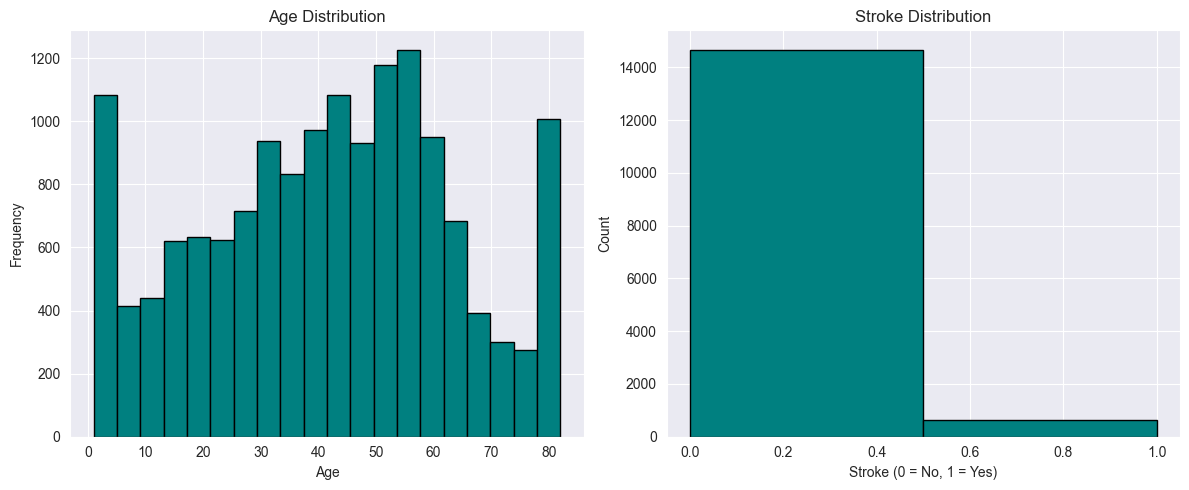

In [75]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(train_df['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
plt.hist(train_df['stroke'], bins=2, edgecolor='black')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Stroke Distribution')

plt.tight_layout()
plt.show()

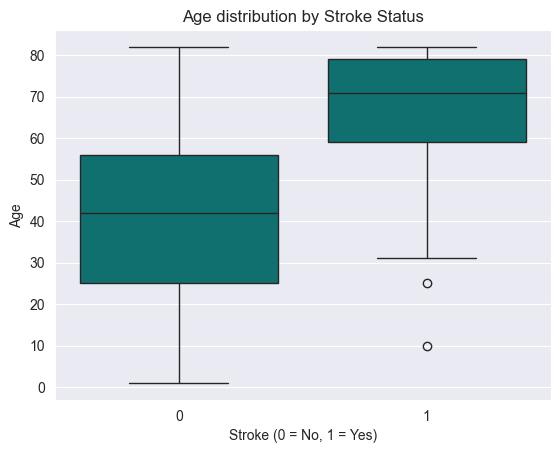

In [76]:

sns.boxplot(x='stroke', y='age', data=train_df)
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.title('Age distribution by Stroke Status')
plt.show()

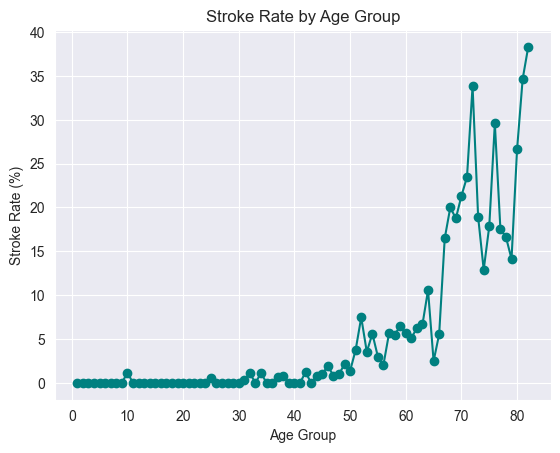

In [77]:
stroke_rate = train_df.groupby('age')['stroke'].mean() * 100  
stroke_rate.plot( marker='o')
plt.xlabel('Age Group')
plt.ylabel('Stroke Rate (%)')
plt.title('Stroke Rate by Age Group')
plt.show()

In [78]:
# Filter data for stroke & Non Stroke
no_stroke_data = train_df[train_df['stroke'] == 0 ]
stroke_data = train_df[train_df['stroke'] == 1 ]

In [79]:
# Univariate Analysis
stroke_count = train_df['stroke'].value_counts()

In [80]:
stroke_count

stroke
0    14671
1      632
Name: count, dtype: int64

In [81]:
fig = px.pie(
    stroke_count, values=stroke_count.values, names=['No', 'Yes'], 
    title = 'Proportion of Stroke Cases', 
    color_discrete_sequence=plot_color)

fig.update_layout(legend_title_text = 'Stroke Status', title_x=0.3, title_y = 0.95)

In [82]:
stroke_data['bmi'].mean()

np.float64(30.230696202531643)

In [83]:
no_stroke_data['bmi'].mean()

np.float64(28.02217163110899)

In [84]:
fig = px.violin(train_df, y = 'bmi', x='stroke', box=True, width=700, height=500, color_discrete_sequence=plot_color, 
                   title='BMI & Stroke Status', 
               labels={'stroke': 'Stroke Status', 'bmi': 'BMI'})
fig.update_layout(title_x = 0.3, title_y = 0.9)
fig.show()

In [85]:
# train_df.columns

In [86]:
# Data Preparation & Preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config

set_config(display = 'diagram')

In [87]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [88]:
input_cols = list(train_df.columns)[1:-1]

In [89]:
target_col = 'stroke'

In [90]:
input_cols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [91]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

test_inputs = test_df[input_cols].copy()

In [92]:
numerical_cols = train_inputs.select_dtypes(include=np.number).columns.to_list()

In [93]:
numerical_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [94]:
categorical_cols = train_inputs.select_dtypes(include='object').columns.to_list()

In [95]:
categorical_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [96]:
categorical_cols.remove('smoking_status')

In [97]:
train_df['smoking_status'].unique()

array(['never smoked', 'formerly smoked', 'Unknown', 'smokes'],
      dtype=object)

In [98]:
ordinal_enc = OrdinalEncoder(categories=[['Unknown','never smoked', 'formerly smoked','smokes']])

In [99]:
onehot_enc = OneHotEncoder(handle_unknown='ignore')

In [100]:
preprocessor = ColumnTransformer([
    ('Ordinal_Encode', ordinal_enc,['smoking_status']), 
    ('OneHot_Encode', onehot_enc,categorical_cols)
]
)

In [101]:
preprocessor.fit(train_inputs)

ColumnTransformer(transformers=[('Ordinal_Encode',
                                 OrdinalEncoder(categories=[['Unknown',
                                                             'never smoked',
                                                             'formerly smoked',
                                                             'smokes']]),
                                 ['smoking_status']),
                                ('OneHot_Encode',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type'])])

In [102]:
encoded_cols = list(preprocessor.get_feature_names_out())

In [103]:
encoded_cols

['Ordinal_Encode__smoking_status',
 'OneHot_Encode__gender_Female',
 'OneHot_Encode__gender_Male',
 'OneHot_Encode__ever_married_No',
 'OneHot_Encode__ever_married_Yes',
 'OneHot_Encode__work_type_Govt_job',
 'OneHot_Encode__work_type_Never_worked',
 'OneHot_Encode__work_type_Private',
 'OneHot_Encode__work_type_Self-employed',
 'OneHot_Encode__work_type_children',
 'OneHot_Encode__Residence_type_Rural',
 'OneHot_Encode__Residence_type_Urban']

In [104]:
train_inputs[encoded_cols] = preprocessor.transform(train_inputs)
test_inputs[encoded_cols] = preprocessor.transform(test_inputs)

In [105]:
X_train = train_inputs[numerical_cols + encoded_cols]
y_train = train_df[target_col]

X_test = test_inputs[numerical_cols + encoded_cols]

In [106]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Ordinal_Encode__smoking_status,OneHot_Encode__gender_Female,OneHot_Encode__gender_Male,OneHot_Encode__ever_married_No,OneHot_Encode__ever_married_Yes,OneHot_Encode__work_type_Govt_job,OneHot_Encode__work_type_Never_worked,OneHot_Encode__work_type_Private,OneHot_Encode__work_type_Self-employed,OneHot_Encode__work_type_children,OneHot_Encode__Residence_type_Rural,OneHot_Encode__Residence_type_Urban
0,28.0,0,0,79.53,31.1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,33.0,0,0,78.44,23.9,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,42.0,0,0,103.00,40.3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,56.0,0,0,64.87,28.8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,24.0,0,0,73.36,28.8,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [107]:
X_train.shape[1] == X_test.shape[1]

True

In [108]:
# Split Dataset into training and validation set
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [110]:
X_train.shape

(12242, 17)

In [112]:
# Baseline Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
models = [
    (LogisticRegression(), 'LogisticRegression'), 
    (RandomForestClassifier(), 'RandomForestClassifier'), 
    (XGBClassifier(), 'XGBClassifier'), 
    (LGBMClassifier(verbose = 1), 'LightGBM')
]

NameError: name 'XGBClassifier' is not defined

In [ ]:
def evalue_model(model, X_train, y_train, X_val, y_val):
    y_pred = model.predict(X_val)
    confusion_mat = confusion_matrix(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    return confusion_mat, accuracy, precision, recall, f1

In [ ]:
confusion_mats = {}
def metric_df(model, model_name):
    confusion_mat, *df = evalue_model(model, X_train, y_train, X_val, y_val)
    confusion_mats[model_name] = confusion_mat
    df = [df]
    model_metrics = pd.DataFrame(data = df, columns=['Accuarcy','Precision', 'Recall', 'F1'])
    model_metrics.insert(0, 'Model', model_name)
    
    return model_metrics

In [ ]:
predictions = []
for model, model_name in models:
    model.fit(X_train, y_train)
    model_metrics = metric_df(model, model_name)
    predictions.append(model_metrics)

In [ ]:
predictions

In [ ]:
oversample = SMOTE()
X_train_ns, y_train_ns = oversample.fit_resample(X_train, y_train)

In [ ]:
X_train_ns.shape

In [ ]:
lr_with_smote = LogisticRegression()
lr_with_smote.fit(X_train_ns, y_train_ns)
lr_with_smote_mat = metric_df(lr_with_smote, 'Logistic With SMOTE')
predictions.append(lr_with_smote_mat)

In [ ]:
for model_name , confusion_mat in confusion_mats.items():
    print(f'Confusion Matrix for {model_name}')
    print(confusion_mat)
    print()

In [ ]:
# Voting Classifer . Hard and Soft
from sklearn.ensemble import VotingClassifier

In [ ]:
estimator = []
estimator.append(('LogisticRegression', LogisticRegression())), 
estimator.append(('RandomForestClassifier', RandomForestClassifier())), 
estimator.append(('XGBClassifier', XGBClassifier())), 
estimator.append(('LightGBM', LGBMClassifier(verbose = 1)))

In [ ]:
VC_hard = VotingClassifier(estimators=estimator, voting='hard')
VC_hard.fit(X_train, y_train)
VC_hard_mat = metric_df(VC_hard, 'VC_HARD')
predictions.append(VC_hard_mat)

In [ ]:
VC_hard_mat

In [ ]:
VC_soft = VotingClassifier(estimators=estimator, voting='soft')
VC_soft.fit(X_train, y_train)
VC_soft_mat = metric_df(VC_soft, 'VC_soft')
predictions.append(VC_soft_mat)

In [ ]:
VC_soft_mat

In [ ]:
prediction_base = pd.concat(predictions, ignore_index=True, sort =False)
prediction_base = prediction_base.sort_values(by=['Recall'], ascending=False).style.hide(axis = 'index')

In [ ]:
prediction_base

In [ ]:
models_to_plot = [
    'LogisticRegression', 
    'RandomForestClassifier', 
    'XGBClassifier', 
    'Logistic With SMOTE'
]

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols =2, figsize = (9, 7))
for ax, model_name in zip(axes.ravel(), models_to_plot):
    confusion_mat = confusion_mats[model_name]
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap = 'Blues', ax = ax)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.subplots_adjust(left=0, right = 0.9, top =0.9, bottom = 0)
plt.show()

In [ ]:
# AUC - ROC Curve Homework ->
from sklearn.metrics import roc_auc_score, roc_curve, auc
# Precision - recall curve
from sklearn.metrics import PredictionErrorDisplay

In [ ]:
# Retrain & Save Model
X_train = train_inputs[numerical_cols + encoded_cols]
y_train = train_df[target_col]

In [ ]:
preds = lr_with_smote.predict(X_test)

In [ ]:
preds

In [ ]:
sub_df = preds

In [ ]:
pd.DataFrame(sub_df).to_csv("submission.csv", index=None)

In [ ]:
sub_df = pd.read_csv("submission.csv")

In [ ]:
sub_df.head()

In [ ]:
# Make Prediction on a single input

sub_df['stroke'] = preds

In [ ]:
sub_df

In [ ]:
train_df.columns

In [ ]:
single_input = {
    'gender': 'Male', 
    'age': 33, 
    'hypertension':0,
    'heart_disease': 0, 
    'ever_married':'Yes',
    'work_type':'Private',
    'Residence_type':'Urban',
    'avg_glucose_level':79.53,
    'bmi': 31.10,
    'smoking_status': 'formerly smoked'
}

In [ ]:
input_df = pd.DataFrame([single_input])

In [ ]:
input_df[encoded_cols] = preprocessor.transform(input_df)

In [ ]:
X = input_df[numerical_cols + encoded_cols]

In [ ]:
lr_with_smote.predict(X)

In [ ]:
import joblib

In [ ]:
model = {
    'encoded_cols': encoded_cols, 
    'numeric_cols':numerical_cols, 
    'preprocessor': preprocessor, 
    'model': lr_with_smote
}

In [ ]:
joblib.dump(model, 'model.joblib')